# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [2]:
df = pd.read_csv('hotel_bookings.csv', encoding='utf8')
df.head(10)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0          0               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   
9  Resort Hotel            1         75               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   
6                        27                          1   
7                        27                          1   
8                        27                          1   
9                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   
5                        0                     2       2  ...    No Deposit   
6                        0                     2       2  ...    No Deposit   
7                        0                     2       2  ...    No Deposit   
8                        0                     3       2  ...    No Deposit   
9                        0                     3       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type    adr  \
0    NaN     NaN                    0     Transient    0.0   
1    NaN     NaN                    0     Transient    0.0   
2    NaN     NaN                    0     Transient   75.0   
3  304.0     NaN                    0     Transient   75.0   
4  240.0     NaN                    0     Transient   98.0   
5  240.0     NaN                    0     Transient   98.0   
6    NaN     NaN                    0     Transient  107.0   
7  303.0     NaN                    0     Transient  103.0   
8  240.0     NaN                    0     Transient   82.0   
9   15.0     NaN                    0     Transient  105.5   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   
5                            0                          1           Check-Out   
6                            0                          0           Check-Out   
7                            0                          1           Check-Out   
8                            0                          1            Canceled   
9                            0                          0            Canceled   

  reservation_status_date  
0     

In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

# Checking Null values

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# removing columns and dropping null

In [6]:
df.dropna(subset=['country', 'children'], inplace=True)

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company         

In [8]:
df.shape

(118898, 32)

In [9]:
df[df['agent'].isnull()]

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
6       Resort Hotel            0          0               2015   
18      Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119124    City Hotel            0          0               2017   
119151    City Hotel            0          0               2017   
119166    City Hotel            0          0               2017   
119215    City Hotel            0          2               2017   
119248    City Hotel            0         22               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
6                    July                        27   
18                   July                        27   
...                   ...                       ...   
119124             August                        35   
119151             August                        35   
119166             August                        35   
119215             August                        35   
119248             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
6                               1                        0   
18                              1                        0   
...                           ...                      ...   
119124                         29                        0   
119151                         29                        0   
119166                         30                        0   
119215                         31                        0   
119248                         29                        0   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
6                          2       2  ...    No Deposit    NaN     NaN   
18                         1       2  ...    No Deposit    NaN   110.0   
...                      ...     ...  ...           ...    ...     ...   
119124                     1       1  ...    No Deposit    NaN    72.0   
119151                     1       2  ...    No Deposit    NaN     NaN   
119166                     1       1  ...    No Deposit    NaN     NaN   
119215                     1       1  ...    No Deposit    NaN     NaN   
119248                     3       1  ...    No Deposit    NaN   485.0   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
6                         0     Transient  107.00   
18                        0     Transient  107.42   
...                     ...           ...     ...   
119124                    0     Transient    0.00   
119151                    0     Transient  270.00   
119166                    0     Transient  140.00   
119215                    0     Transient  140.00   
119248                    0     Transient   75.00   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
6             

In [10]:
df['agent'].value_counts()

9.0      31959
240.0    13871
1.0       7191
14.0      3638
7.0       3539
         ...  
197.0        1
450.0        1
352.0        1
367.0        1
346.0        1
Name: agent, Length: 332, dtype: int64

In [11]:
#dropping agent, country, arrival_date_week_number columns 
df.drop('agent', axis=1, inplace=True)
df.drop('company', axis=1, inplace=True)
df.drop('arrival_date_week_number', axis=1, inplace=True)

In [12]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_day_of_month  stays_in_weekend_nights  \
0                    July                          1                        0   
1                    July                          1                        0   
2                    July                          1                        0   
3                    July                          1                        0   
4                    July                          1                        0   
...                   ...                        ...                      ...   
119385             August                         30                        2   
119386             August                         31                        2   
119387             August                         31                        2   
119388             August                         31                        2   
119389             August                         29                        2   

        stays_in_week_nights  adults  children  ...  assigned_room_type  \
0                          0       2       0.0  ...                   C   
1                          0       2       0.0  ...                   C   
2                          1       1       0.0  ...                   C   
3                          1       1       0.0  ...                   A   
4                          2       2       0.0  ...                   A   
...                      ...     ...       ...  ...                 ...   
119385                     5       2       0.0  ...                   A   
119386                     5       3       0.0  ...                   E   
119387                     5       2       0.0  ...                   D   
119388                     5       2       0.0  ...                   A   
119389                     7       2       0.0  ...                   A   

       booking_changes deposit_type days_in_waiting_list customer_type  \
0                    3   No Deposit                    0     Transient   
1                    4   No Deposit                    0     Transient   
2                    0   No Deposit                    0     Transient   
3                    0   No Deposit                    0     Transient   
4                    0   No Deposit                    0     Transient   
...                ...          ...                  ...           ...   
119385               0   No Deposit                    0     Transient   
119386               0   No Deposit                    0     Transient   
119387               0   No Deposit                    0     Transient   
119388               0   No Deposit                    0     Transient   
119389               0   No Deposit                    0     Transient   

           adr  required_car_parking_spaces  total_of_special_requests  \
0         0.00                            0                          0   
1         0.00                            0                          0   
2        75.00                            0                          0   
3        75.00                            0                          0   
4        98.00                            0                          1   
...

In [13]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [14]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [15]:
d = {'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November':11, 'December': 12,
       'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6}

In [16]:
df['arrival_date_month'] = df['arrival_date_month'].map(d)

In [17]:
df['arrival_date_month'].iloc[0]

7

In [18]:
df['arrival_date_day_of_month']=df['arrival_date_day_of_month'].apply(str)
df['arrival_date_month'] = df['arrival_date_month'].apply(str)
df['arrival_date_year']=df['arrival_date_year'].apply(str)

# Deduplication

In [19]:
df = df.drop_duplicates()

In [20]:
df

hotel  is_canceled  lead_time arrival_date_year  \
0       Resort Hotel            0        342              2015   
1       Resort Hotel            0        737              2015   
2       Resort Hotel            0          7              2015   
3       Resort Hotel            0         13              2015   
4       Resort Hotel            0         14              2015   
...              ...          ...        ...               ...   
119385    City Hotel            0         23              2017   
119386    City Hotel            0        102              2017   
119387    City Hotel            0         34              2017   
119388    City Hotel            0        109              2017   
119389    City Hotel            0        205              2017   

       arrival_date_month arrival_date_day_of_month  stays_in_weekend_nights  \
0                       7                         1                        0   
1                       7                         1                        0   
2                       7                         1                        0   
3                       7                         1                        0   
4                       7                         1                        0   
...                   ...                       ...                      ...   
119385                  8                        30                        2   
119386                  8                        31                        2   
119387                  8                        31                        2   
119388                  8                        31                        2   
119389                  8                        29                        2   

        stays_in_week_nights  adults  children  ...  assigned_room_type  \
0                          0       2       0.0  ...                   C   
1                          0       2       0.0  ...                   C   
2                          1       1       0.0  ...                   C   
3                          1       1       0.0  ...                   A   
4                          2       2       0.0  ...                   A   
...                      ...     ...       ...  ...                 ...   
119385                     5       2       0.0  ...                   A   
119386                     5       3       0.0  ...                   E   
119387                     5       2       0.0  ...                   D   
119388                     5       2       0.0  ...                   A   
119389                     7       2       0.0  ...                   A   

       booking_changes deposit_type days_in_waiting_list customer_type  \
0                    3   No Deposit                    0     Transient   
1                    4   No Deposit                    0     Transient   
2                    0   No Deposit                    0     Transient   
3                    0   No Deposit                    0     Transient   
4                    0   No Deposit                    0     Transient   
...                ...          ...                  ...           ...   
119385               0   No Deposit                    0     Transient   
119386               0   No Deposit                    0     Transient   
119387               0   No Deposit                    0     Transient   
119388               0   No Deposit                    0     Transient   
119389               0   No Deposit                    0     Transient   

           adr  required_car_parking_spaces  total_of_special_requests  \
0         0.00                            0                          0   
1         0.00                            0                          0   
2        75.00                            0                          0   
3        75.00                            0                          0   
4        98.00                            0                          1   
...        ...             

# EDA

In [21]:
sns.pairplot(df, hue='reservation_status', height=10).add_legend()
plt.show()

# Merging necessary columns

In [22]:
df['arrival_date'] = df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].agg('-'.join, axis=1)

In [23]:
df

hotel  is_canceled  lead_time arrival_date_year  \
0       Resort Hotel            0        342              2015   
1       Resort Hotel            0        737              2015   
2       Resort Hotel            0          7              2015   
3       Resort Hotel            0         13              2015   
4       Resort Hotel            0         14              2015   
...              ...          ...        ...               ...   
119385    City Hotel            0         23              2017   
119386    City Hotel            0        102              2017   
119387    City Hotel            0         34              2017   
119388    City Hotel            0        109              2017   
119389    City Hotel            0        205              2017   

       arrival_date_month arrival_date_day_of_month  stays_in_weekend_nights  \
0                       7                         1                        0   
1                       7                         1                        0   
2                       7                         1                        0   
3                       7                         1                        0   
4                       7                         1                        0   
...                   ...                       ...                      ...   
119385                  8                        30                        2   
119386                  8                        31                        2   
119387                  8                        31                        2   
119388                  8                        31                        2   
119389                  8                        29                        2   

        stays_in_week_nights  adults  children  ...  booking_changes  \
0                          0       2       0.0  ...                3   
1                          0       2       0.0  ...                4   
2                          1       1       0.0  ...                0   
3                          1       1       0.0  ...                0   
4                          2       2       0.0  ...                0   
...                      ...     ...       ...  ...              ...   
119385                     5       2       0.0  ...                0   
119386                     5       3       0.0  ...                0   
119387                     5       2       0.0  ...                0   
119388                     5       2       0.0  ...                0   
119389                     7       2       0.0  ...                0   

       deposit_type days_in_waiting_list customer_type     adr  \
0        No Deposit                    0     Transient    0.00   
1        No Deposit                    0     Transient    0.00   
2        No Deposit                    0     Transient   75.00   
3        No Deposit                    0     Transient   75.00   
4        No Deposit                    0     Transient   98.00   
...             ...                  ...           ...     ...   
119385   No Deposit                    0     Transient   96.14   
119386   No Deposit                    0     Transient  225.43   
119387   No Deposit                    0     Transient  157.71   
119388   No Deposit                    0     Transient  104.40   
119389   No Deposit                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          1   
...                             ...                        ...   
119385                            0                          0   
119386                            0                          2   
119387   

In [24]:
df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)

In [25]:
df

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
0       Resort Hotel            0        342                        0   
1       Resort Hotel            0        737                        0   
2       Resort Hotel            0          7                        0   
3       Resort Hotel            0         13                        0   
4       Resort Hotel            0         14                        0   
...              ...          ...        ...                      ...   
119385    City Hotel            0         23                        2   
119386    City Hotel            0        102                        2   
119387    City Hotel            0         34                        2   
119388    City Hotel            0        109                        2   
119389    City Hotel            0        205                        2   

        stays_in_week_nights  adults  children  babies meal country  ...  \
0                          0       2       0.0       0   BB     PRT  ...   
1                          0       2       0.0       0   BB     PRT  ...   
2                          1       1       0.0       0   BB     GBR  ...   
3                          1       1       0.0       0   BB     GBR  ...   
4                          2       2       0.0       0   BB     GBR  ...   
...                      ...     ...       ...     ...  ...     ...  ...   
119385                     5       2       0.0       0   BB     BEL  ...   
119386                     5       3       0.0       0   BB     FRA  ...   
119387                     5       2       0.0       0   BB     DEU  ...   
119388                     5       2       0.0       0   BB     GBR  ...   
119389                     7       2       0.0       0   HB     DEU  ...   

       booking_changes deposit_type  days_in_waiting_list  customer_type  \
0                    3   No Deposit                     0      Transient   
1                    4   No Deposit                     0      Transient   
2                    0   No Deposit                     0      Transient   
3                    0   No Deposit                     0      Transient   
4                    0   No Deposit                     0      Transient   
...                ...          ...                   ...            ...   
119385               0   No Deposit                     0      Transient   
119386               0   No Deposit                     0      Transient   
119387               0   No Deposit                     0      Transient   
119388               0   No Deposit                     0      Transient   
119389               0   No Deposit                     0      Transient   

           adr required_car_parking_spaces total_of_special_requests  \
0         0.00                           0                         0   
1         0.00                           0                         0   
2        75.00                           0                         0   
3        75.00                           0                         0   
4        98.00                           0                         1   
...        ...                         ...                       ...   
119385   96.14                           0                         0   
119386  225.43                           0                         2   
119387  157.71                           0                         4   
119388  104.40                           0                         0   
119389  151.20                           0                         2   

        reservation_status reservation_status_date  arrival_date  
0                Check-Out              2015-07-01      2015-7-1  
1                Check-Out              2015-07-01      2015-7-1  
2                Check-Out              2015-07-02      2015-7-1  
3                Check-Out              2015-07-02      2015-7-1  
4                Check-Out              2015-07-03      2015-7-1  
...                    ...                   

In [26]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

# Initializing the label encoder

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
for i in df.columns:
    print(i)
    print(type(df[i].iloc[0]))
    

hotel
<class 'str'>
is_canceled
<class 'numpy.int64'>
lead_time
<class 'numpy.int64'>
stays_in_weekend_nights
<class 'numpy.int64'>
stays_in_week_nights
<class 'numpy.int64'>
adults
<class 'numpy.int64'>
children
<class 'numpy.float64'>
babies
<class 'numpy.int64'>
meal
<class 'str'>
country
<class 'str'>
market_segment
<class 'str'>
distribution_channel
<class 'str'>
is_repeated_guest
<class 'numpy.int64'>
previous_cancellations
<class 'numpy.int64'>
previous_bookings_not_canceled
<class 'numpy.int64'>
reserved_room_type
<class 'str'>
assigned_room_type
<class 'str'>
booking_changes
<class 'numpy.int64'>
deposit_type
<class 'str'>
days_in_waiting_list
<class 'numpy.int64'>
customer_type
<class 'str'>
adr
<class 'numpy.float64'>
required_car_parking_spaces
<class 'numpy.int64'>
total_of_special_requests
<class 'numpy.int64'>
reservation_status
<class 'str'>
reservation_status_date
<class 'str'>
arrival_date
<class 'str'>


In [29]:
df['hotel'] = le.fit_transform(df['hotel'])
df['country'] = le.fit_transform(df['country'])
df['market_segment'] = le.fit_transform(df['market_segment'])
df['reserved_room_type'] = le.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = le.fit_transform(df['assigned_room_type'])
df['deposit_type'] = le.fit_transform(df['deposit_type'])
df['customer_type'] = le.fit_transform(df['customer_type'])
df['reservation_status'] = le.fit_transform(df['reservation_status'])
df['meal'] = le.fit_transform(df['meal'])
df['distribution_channel'] = le.fit_transform(df['distribution_channel'])

In [30]:
df

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
0           1            0        342                        0   
1           1            0        737                        0   
2           1            0          7                        0   
3           1            0         13                        0   
4           1            0         14                        0   
...       ...          ...        ...                      ...   
119385      0            0         23                        2   
119386      0            0        102                        2   
119387      0            0         34                        2   
119388      0            0        109                        2   
119389      0            0        205                        2   

        stays_in_week_nights  adults  children  babies  meal  country  ...  \
0                          0       2       0.0       0     0      135  ...   
1                          0       2       0.0       0     0      135  ...   
2                          1       1       0.0       0     0       59  ...   
3                          1       1       0.0       0     0       59  ...   
4                          2       2       0.0       0     0       59  ...   
...                      ...     ...       ...     ...   ...      ...  ...   
119385                     5       2       0.0       0     0       15  ...   
119386                     5       3       0.0       0     0       56  ...   
119387                     5       2       0.0       0     0       43  ...   
119388                     5       2       0.0       0     0       59  ...   
119389                     7       2       0.0       0     2       43  ...   

        booking_changes  deposit_type  days_in_waiting_list  customer_type  \
0                     3             0                     0              2   
1                     4             0                     0              2   
2                     0             0                     0              2   
3                     0             0                     0              2   
4                     0             0                     0              2   
...                 ...           ...                   ...            ...   
119385                0             0                     0              2   
119386                0             0                     0              2   
119387                0             0                     0              2   
119388                0             0                     0              2   
119389                0             0                     0              2   

           adr  required_car_parking_spaces  total_of_special_requests  \
0         0.00                            0                          0   
1         0.00                            0                          0   
2        75.00                            0                          0   
3        75.00                            0                          0   
4        98.00                            0                          1   
...        ...                          ...                        ...   
119385   96.14                            0                          0   
119386  225.43                            0                          2   
119387  157.71                            0                          4   
119388  104.40                            0                          0   
119389  151.20                            0                          2   

        reservation_status  reservation_status_date  arrival_date  
0                        1               2015-07-01      2015-7-1  
1                        1               2015-07-01      2015-7-1  
2                        1               2015-07-02      2015-7-1  
3                        1               2015-07-02      2015-7-1  
4                        1               2015-07-03      2015-7-1  
...                    ...                  

In [31]:
#converting dates to unix timestamp
dates = pd.to_datetime(df['arrival_date'])
df['arrival_date'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') 

dates = pd.to_datetime(df['reservation_status_date'])
df['reservation_status_date'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') 

In [32]:
for i in df.columns:
    print(type(df[i].iloc[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


# Spliting the dataset into feature and label

In [33]:
label = df['reservation_status']
df.drop('reservation_status', axis=1, inplace=True)

# Standardization

In [34]:
ss = StandardScaler()
df = ss.fit_transform(df)

# Dimensionality Reduction

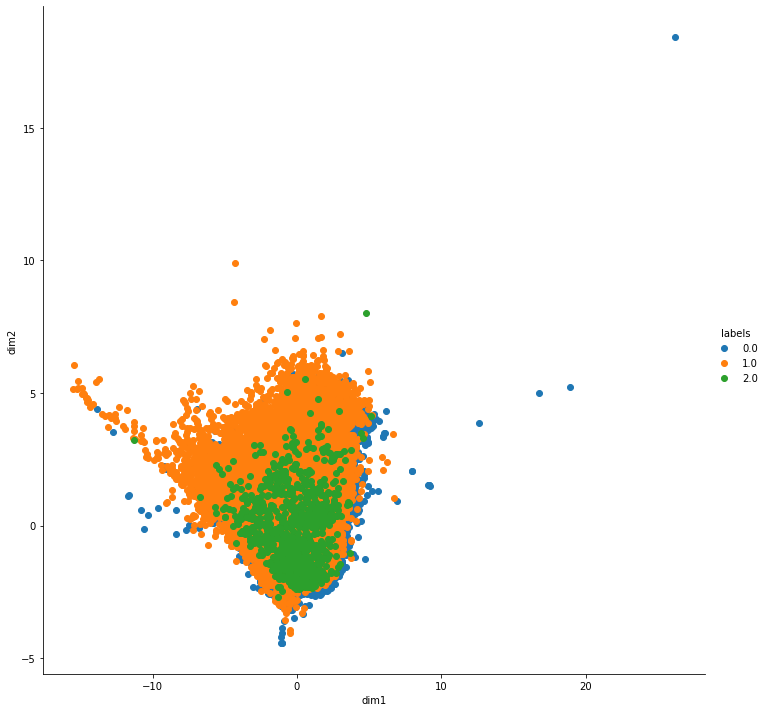

In [35]:
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(df)
pca_data = pca_data.T
pca_data = np.vstack((pca_data, label)).T
pca_df = pd.DataFrame(data=pca_data, columns=('dim1', 'dim2', 'labels'))
sns.FacetGrid(pca_df, hue='labels', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()


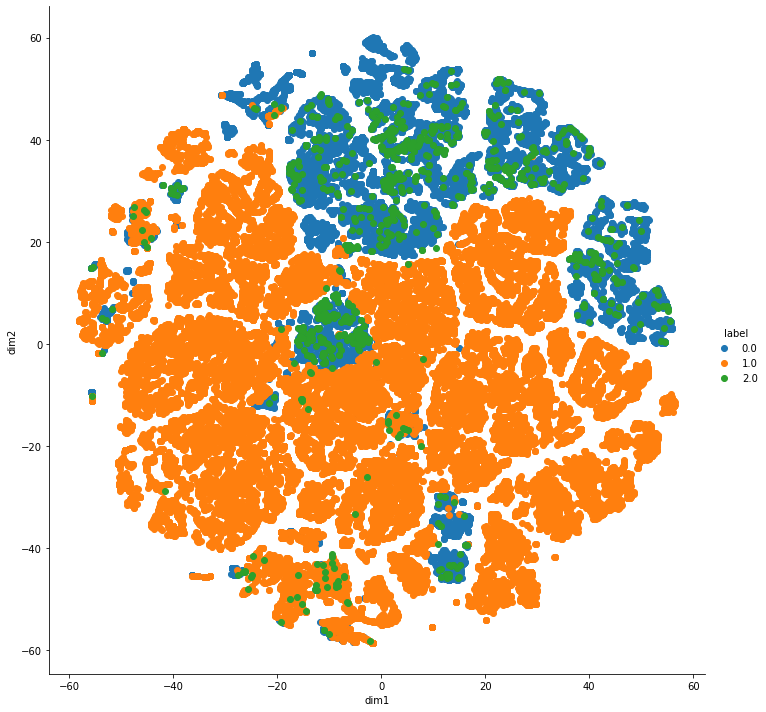

In [36]:
model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
tsne_data = model.fit_transform(df)

tsne_data = np.vstack((tsne_data.T, label)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('dim1', 'dim2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()

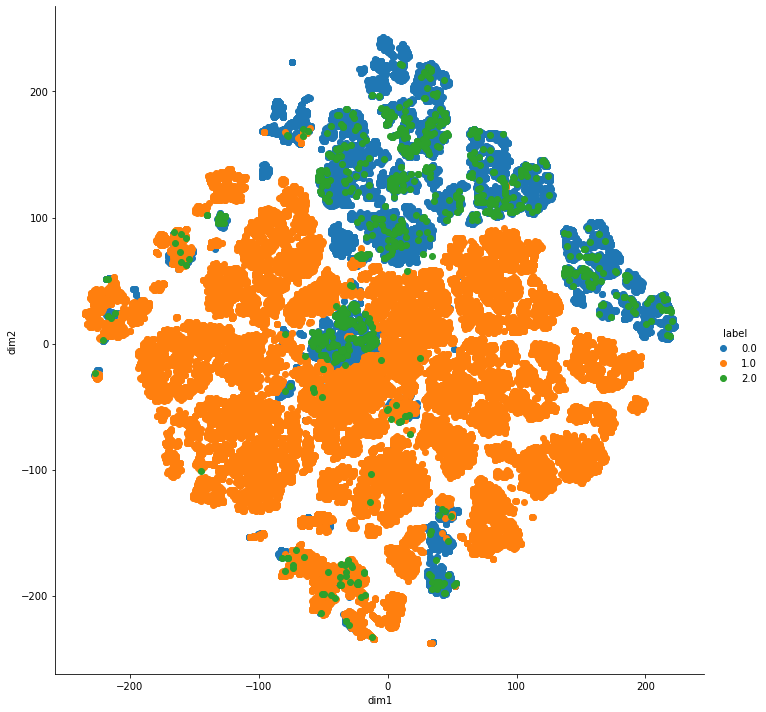

In [37]:
model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=5000)
tsne_data = model.fit_transform(df)

tsne_data = np.vstack((tsne_data.T, label)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('dim1', 'dim2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()

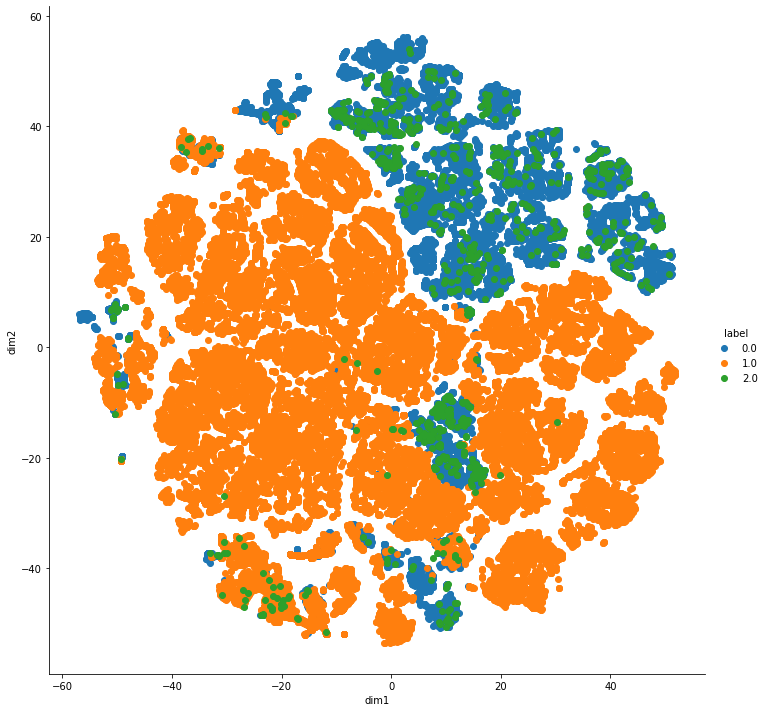

In [38]:
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1000)
tsne_data = model.fit_transform(df)

tsne_data = np.vstack((tsne_data.T, label)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('dim1', 'dim2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()

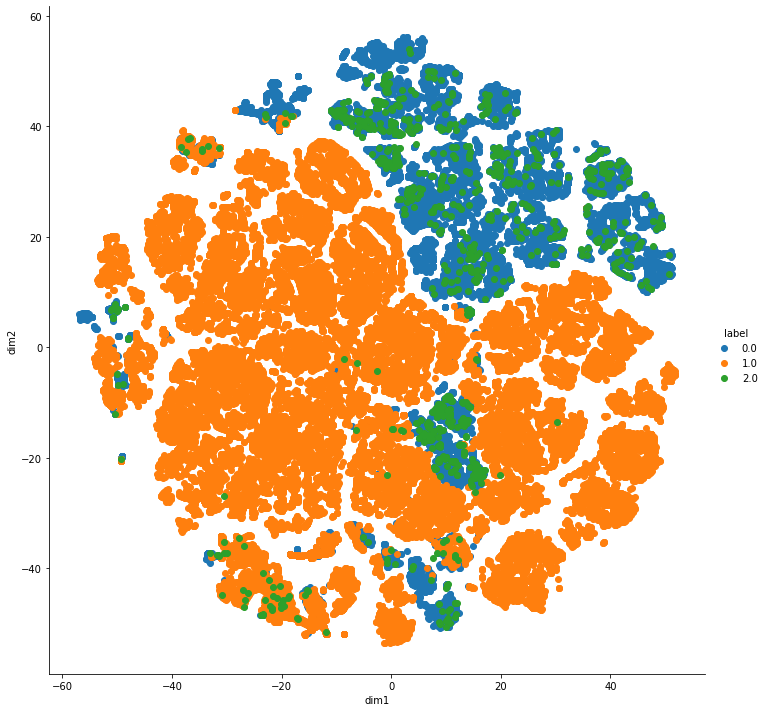

In [39]:
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1000)
tsne_data = model.fit_transform(df)

tsne_data = np.vstack((tsne_data.T, label)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('dim1', 'dim2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()